# Imports

In [4]:
# Supress warnings
import warnings; warnings.filterwarnings('ignore')

# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# graphic visualization setup
sns.set()
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Lato']

# color pallete for graphics
colors ={
    'cyan': '#1696d2',
    'gray': '#5c5859',
    'black': '#000000',
    'yellow': '#fdbf11',
    'orange': '#ca5800',
    'magenta': '#af1f6b',
    'green': '#408941',
    'red': '#a4201d'
}

# Image drawing colors
BLUE   = '#00fafd'    # rgb(0,250,253)
YELLOW = '#f5b324'    # rgb(245,179,36)

# Terminal colors
WHITE = '\033[39m'
CYAN = '\033[36m'
GREEN = '\033[32m'
RED = '\033[31m'

# Libraries version
print('Libraries versions:')
print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

# Styling notebook with CSS
from IPython.core.display import HTML
styles = open("/Users/baiochi/OneDrive/GitHub/LetsCode/misc/styles/custom_jupyter_notebook.css", "r").read()
HTML(styles)

Libraries versions:
Numpy: 1.20.3
Pandas: 1.3.4
Seaborn: 0.11.2
Matplotlib: 3.4.3


In [13]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, precision_recall_curve

def display_classification_metrics(estimator, X_train, X_test, y_train, y_test, 
									plot_roc_auc=True, plot_confusion_matrix=True, plot_precision_recall=True):

	# predict for train/test
	y_pred_train = estimator.predict(X_train)
	y_pred_test = estimator.predict(X_test)
	# predict proba for train/test
	y_proba_train = estimator.predict_proba(X_train)
	y_proba_test = estimator.predict_proba(X_test)

	# Calculate ROC AUC Score
	print(f'{CYAN}ROC AUC Score for Train dataset:{WHITE} {roc_auc_score(y_train, y_proba_train[:,1])}')
	print(f'{CYAN}ROC AUC Score for Test dataset:{WHITE} {roc_auc_score(y_test, y_proba_test[:,1])}')
	print()
	# Classification report: precision, recall, f1-score
	print(f'{CYAN}Train data Classification Report:{WHITE}\n',classification_report(y_train, y_pred_train))
	print(f'{CYAN}Test data Classification Report:{WHITE}\n',classification_report(y_test, y_pred_test))

	if plot_roc_auc:
		# get false positive rates and true positive rates
		fpr, tpr, _ = roc_curve(y_test, y_proba_test[:,1])
		# score for test dataset
		score = round(roc_auc_score(y_test, y_proba_test[:,1]),3)
		# plot ROC AUC curve
		plt.figure(figsize=(8,6))
		plt.plot(fpr, tpr, label=f'Classifier AUC = {score}')
		plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), ls=':', label='Random = 0.5')
		plt.title('ROC AUC curve', fontsize=18, pad=20, loc='left')
		plt.xlabel('False Positive Rate')
		plt.ylabel('True Positive Rate')
		plt.legend()
		plt.tight_layout()
		plt.show()

	if plot_precision_recall:
		# get precisions, recalls and thres
		precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_test[:,1])
		# plot Precision-Recall curve
		plt.figure(figsize=(8,6))
		plt.plot(thresholds, precisions[:-1], label='Precision')
		plt.plot(thresholds, recalls[:-1], label='Recall', color='black')
		plt.title('Precision-Recall curve', fontsize=18, pad=20, loc='left')
		plt.xlabel('Tresholds cutoffs')
		plt.legend()
		plt.tight_layout()
		plt.show()
		
	if plot_confusion_matrix:
		fig, ax = plt.subplots(1,2,figsize=(10,6))
		# plot Confusion Matrix from Train dataset
		fig.suptitle('Confusion Matrix', size=22)
		ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[0], colorbar=False)
		ax[0].grid(False)
		ax[0].set_title('Train dataset', size=18, pad=20)

		# plot Confusion Matrix from Test dataset
		cf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[1], colorbar=False)
		ax[1].grid(False)
		ax[1].set_title('Test dataset', size=18, pad=20)
		
		# coordinates to plot colorbar on the right plot
		cax = plt.axes([0.95, 0.21, 0.03, 0.60])
		plt.colorbar(cf.im_, cax=cax)
		plt.show()

# Potato

In [5]:
df = pd.read_csv('data/SMSSpamCollection', sep='\t', names=['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

# 20 elements
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=52)

# 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=52)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

X_train_counts.shape

(4457, 7763)

In [9]:
# TF-IDF

#TF: Freq de aparição de um termo
#IDF: Inverso da freq que um termo aparece em diferentes "corpus"

#TF-IDF: term freq * inverse document freq ---> classifica a imporrtância

from sklearn.feature_extraction.text import TfidfTransformer

#instancia a classe
tfidf_transform = TfidfTransformer()

X_train_tfidf = tfidf_transform.fit_transform(X_train_counts)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

#instancia a classe
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

In [11]:
from sklearn.svm import LinearSVC

#instancia a classe
c = LinearSVC()

c.fit(X_train_tfidf, y_train)

LinearSVC()

In [15]:
from xgboost import XGBClassifier

In [25]:
from sklearn.pipeline import Pipeline

#cria o pipeline com o vetorizador e o modelo
xgb = Pipeline([('tfidf', TfidfVectorizer()),('xgbc', XGBClassifier())])

xgb.fit(X_train, y_train)

[22:02:16] WARNING: /private/var/folders/_m/3m0bcc4n6h73gny0bt6_g4x80000gn/T/pip-install-4m5tp6_t/xgboost_17c0d7c1e7cb4a3aab80bf74764ec6a2/build/temp.macosx-10.9-x86_64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('c',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

Train data Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00      2422
        spam       1.00      0.99      1.00       364

    accuracy                           1.00      2786
   macro avg       1.00      1.00      1.00      2786
weighted avg       1.00      1.00      1.00      2786

Test data Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      2403
        spam       0.97      0.80      0.88       383

    accuracy                           0.97      2786
   macro avg       0.97      0.90      0.93      2786
weighted avg       0.97      0.97      0.97      2786



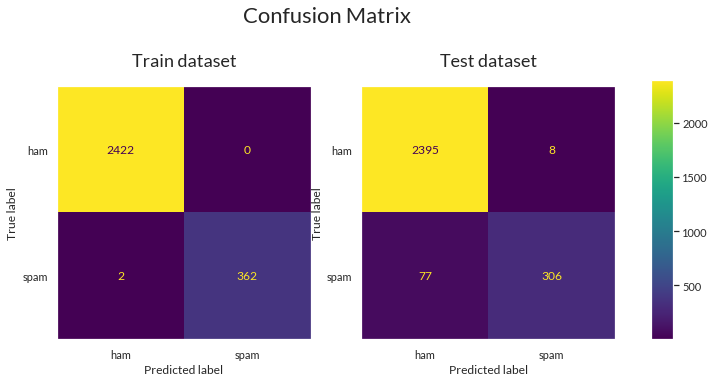

In [26]:
# predict for train/test
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Classification report: precision, recall, f1-score
print(f'{CYAN}Train data Classification Report:{WHITE}\n',classification_report(y_train, y_pred_train))
print(f'{CYAN}Test data Classification Report:{WHITE}\n',classification_report(y_test, y_pred_test))

fig, ax = plt.subplots(1,2,figsize=(10,6))
# plot Confusion Matrix from Train dataset
fig.suptitle('Confusion Matrix', size=22)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[0], colorbar=False)
ax[0].grid(False)
ax[0].set_title('Train dataset', size=18, pad=20)

# plot Confusion Matrix from Test dataset
cf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[1], colorbar=False)
ax[1].grid(False)
ax[1].set_title('Test dataset', size=18, pad=20)

# coordinates to plot colorbar on the right plot
cax = plt.axes([0.95, 0.21, 0.03, 0.60])
plt.colorbar(cf.im_, cax=cax)
plt.show()

In [27]:
xgb.predict(['Click here and I will get your password'])

array(['ham'], dtype=object)